<a href="https://colab.research.google.com/github/shylesharepelly/The-Spark-Foundation/blob/main/Task_1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path =  "http://bit.ly/w-data"
data = pd.read_csv(path)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


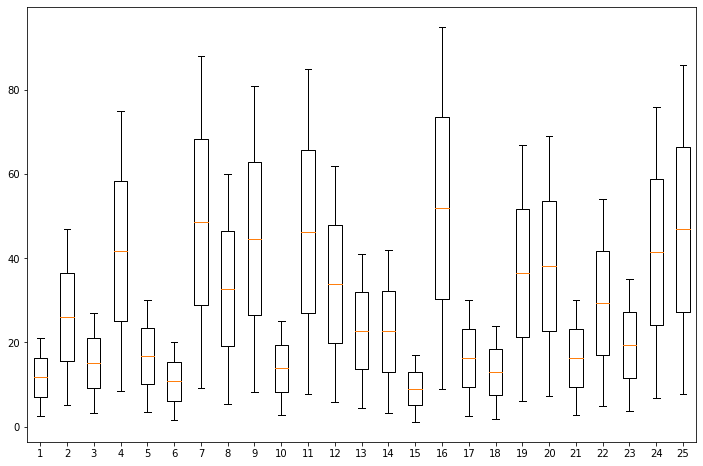

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot(data)
plt.show()

 data Visualization

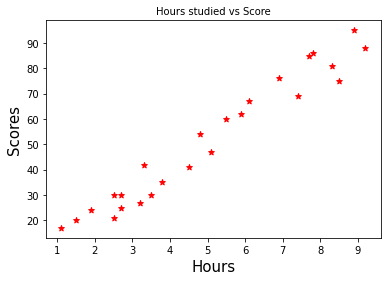

In [ ]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(data.Hours,data.Scores,color='red',marker='*')
plt.show()

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [ ]:
print("X_train.shape =", X_train.shape)
print("Y_train.shape =", Y_train.shape)
print("X_test.shape  =", X_test.shape)
print("Y_test.shape  =", Y_test.shape)

X_train.shape = (20, 1)
Y_train.shape = (20,)
X_test.shape  = (5, 1)
Y_test.shape  = (5,)


In [ ]:
linreg=LinearRegression()

In [ ]:
linreg.fit(X_train,Y_train)
print("training complete")

training complete


In [ ]:
print("B0 =",linreg.intercept_)

B0 = 2.018160041434662


In [ ]:
print("B1 =",linreg.coef_)

B1 = [9.91065648]


In [ ]:
line = linreg.intercept_ + linreg.coef_*X_train

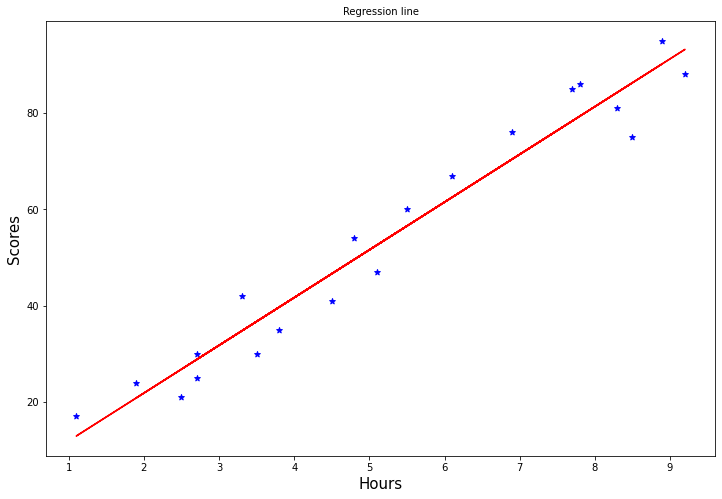

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, Y_train,color='blue',marker='*')
plt.plot(X_train, line,color='red');
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line",fontsize=10)
plt.show()

**model testing**

In [ ]:
pred_Y=linreg.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_Y}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
print("Training Score:",linreg.score(X_train,Y_train))
print("Test Score:",linreg.score(X_test,Y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


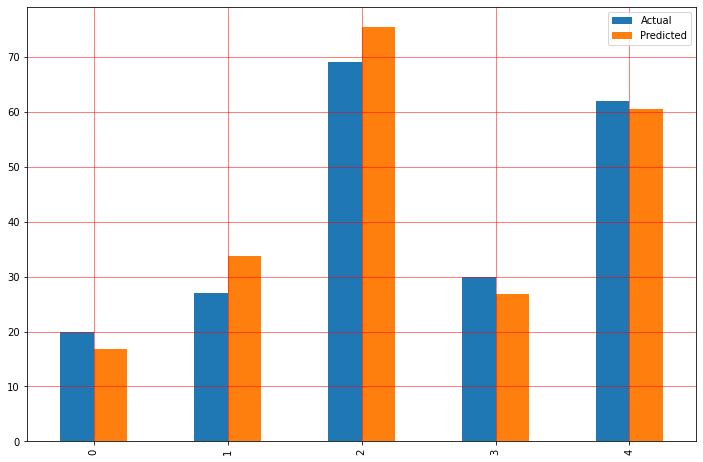

In [ ]:
df.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test,pred_Y)

0.9454906892105354

**our model got approximately 94% accuracy which is accepted**

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, pred_Y)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred_Y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred_Y)))
print('R-2:', metrics.r2_score(Y_test, pred_Y))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


In [ ]:
Predicted_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Predicted_score)

predicted score for a student studying 9.25 hours : [93.69173249]


**From the above result , I can conclude that if a student study for 9.25 hours , student can score approximately 93.5 marks**